In [365]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from datetime import datetime 
import datetime
from alpaca_trade_api.rest import REST, TimeFrame
import tweepy
%matplotlib inline
from pathlib import Path
import csv
import re
import emoji
import nltk
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
import spacy
from spacy import displacy
import warnings
import numpy as np
import pandas as pd
import hvplot.pandas
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from numpy.random import seed
#seed(1)
from tensorflow import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from IPython.display import Image
from IPython.core.display import HTML 
import panel as pn
pn.extension('plotly')
from PIL import Image
from sklearn.metrics import roc_curve, auc
from datetime import date
import pytz
from time import sleep
import seaborn as sns
#random.set_seed(2)
warnings.filterwarnings('ignore')
nltk.download('vader_lexicon')
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sameerlakhe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


***This project gets the Twitter sentiment for the NFT collection BoaredApeYatchClub by fetching tweets using Tweepy API. It also gets the prices of the collection for a date range from OpeanSea using API provided by OpenSea. It get the ETH (ethereum) price using Alpacha API**
- Load the env where keys for Twitter, OpenSea and Alpacha API are defined
- Get the image URLs for the BAYC collection and display those randomly

In [288]:
# Load .env enviroment variables
load_dotenv()
asset_base_url = "https://api.opensea.io/api/v1/assets"
collection_slug="boredapeyachtclub"
opensea_api_key = os.getenv("opensea_api_key")
# define headers as global variable it is used in multiple get API calls
headers = {
        "Accept": "application/json",
        "X-API-KEY": opensea_api_key
    }
#this function will invoke opensea API to get different assets in the NFT collection
# it takes the collection name and the limit of assets to be fetched
def get_asset(collection_slug,limit):
    query = { 
        "include_orders":False,
        "collection_slug":collection_slug,
        "limit":limit
    }
    response = requests.request("GET", asset_base_url, headers=headers,params=query)
    return response.json()


In [289]:
asset_limit=200
bayc_assets_data=get_asset(collection_slug,asset_limit)
#print(json.dumps(doodle_assets,indent=4))
bayc_assets = bayc_assets_data["assets"]
#print(json.dumps(doodle_assets,indent=4))

#this function will iterater over the asset json data and get the thumbnail image URL
# it will return a list of thumbnail URLs
def get_asset_image_urls(assets):
    asset_image_urls=[]
    for asset in assets:
        asset_image_thumbnail_url = asset["image_thumbnail_url"]
        if asset_image_thumbnail_url is not None:
            asset_image_urls.append(asset_image_thumbnail_url)
    return asset_image_urls

asset_image_urls = get_asset_image_urls(bayc_assets)


#this method will pick random thumbnail URLs from the list and fetch images using the URL
# it will create a panel row with the images and add the row to the panel column
# and will return the column
def create_panel(asset_image_urls,total_images_to_display):
    image_rows = pn.Row()
    image_urls = get_unique_image_urls(asset_image_urls,total_images_to_display)
    for i in range(0,len(image_urls)):
        random_url = np.random.choice(asset_image_urls)
        im = Image.open(requests.get(random_url, stream=True).raw)
        fig = get_image_figure(im)
        image_rows.append(fig)
    panel_column = pn.Column(image_rows)
    return panel_column

def get_unique_image_urls(asset_image_urls,total_images_to_display):
    image_urls = set()
    while (len(image_urls)<total_images_to_display):
        image_urls.add(np.random.choice(asset_image_urls))
    return image_urls

#this function takes the image object and wraps it in a figure and returns
# the figure 
def get_image_figure(image):
    fig=plt.figure(figsize=(3.5,3.5))
    plt.imshow(image)
    plt.close(fig)
    return fig

create_panel(asset_image_urls,total_images_to_display)

asset_limit=100
total_images_to_display=3

# this is a function that consolidates all above functions 
# i.e 1) fetch asset data 2) get image URL from response JSON 3) create image and add it to panel
def display_colleaction_assets(collection_slug,asset_limit,total_images_to_display):
    collection_slug_assets_data=get_asset(collection_slug,asset_limit)
    collection_slug_assets = collection_slug_assets_data["assets"]
    asset_image_urls = get_asset_image_urls(collection_slug_assets)
    panel = create_panel(asset_image_urls,total_images_to_display)
    return panel

***Display sample images from BAYC NFT collection***

Column
    [0] Row
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
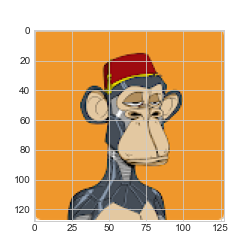
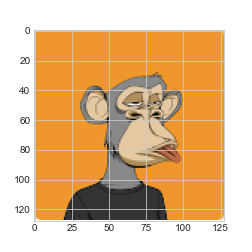
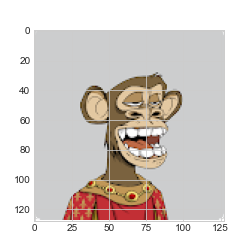

In [379]:
#invoke the function with the collection name and display 
# random thumbnails of the NFTs in the collection
panel = display_colleaction_assets(collection_slug,asset_limit,total_images_to_display)
panel

In [376]:
# Load .env enviroment variables for Twitter
bearer_token =  os.getenv('TWITTER_BEARER_TOKEN')
api_key =  os.getenv('TWITTER_API_KEY')
api_secret_key =  os.getenv('TWITTER_SECRET_KEY')
access_token =  os.getenv('TWITTER_ACCESS_TOKEN')
access_secret_token =  os.getenv('TWITTER_SECRET_TOKEN')

#keys for essential acccess
def get_api_keys():
    api_key =  os.getenv('TWITTER_API_KEY')
    api_secret_key =  os.getenv('TWITTER_SECRET_KEY')
    bearer_token =  os.getenv('TWITTER_BEARER_TOKEN')
    access_token =  os.getenv('TWITTER_ACCESS_TOKEN')
    access_secret_token =  os.getenv('TWITTER_SECRET_TOKEN')
    return api_key,api_secret_key,bearer_token,access_token,access_secret_token

#keys for elevated access
def get_api_keys1():
    api_key =  os.getenv('access_token')
    api_secret_key =  os.getenv('access_token_secret')
    bearer_token =  os.getenv('bearer_token1')
    access_token =  os.getenv('consumer_key')
    access_secret_token =  os.getenv('consumer_secret')
    return api_key,api_secret_key,bearer_token,access_token,access_secret_token

#getApiKeys1 have the elevated access to  twitter API
api_key,api_secret_key,bearer_token,access_token,access_secret_token = get_api_keys1()


***Below query is to get an idea of the total number of tweets that satisfy the search criteria***
- The data fetched is limited by the rate limit for the access type

In [292]:
query = "BAYC"
client = tweepy.Client(bearer_token=bearer_token)
counts = client.get_recent_tweets_count(query=query,granularity="day")
for count in counts.data:
    print(count)

{'end': '2022-06-13T00:00:00.000Z', 'start': '2022-06-12T03:20:56.000Z', 'tweet_count': 31294}
{'end': '2022-06-14T00:00:00.000Z', 'start': '2022-06-13T00:00:00.000Z', 'tweet_count': 26357}
{'end': '2022-06-15T00:00:00.000Z', 'start': '2022-06-14T00:00:00.000Z', 'tweet_count': 16489}
{'end': '2022-06-16T00:00:00.000Z', 'start': '2022-06-15T00:00:00.000Z', 'tweet_count': 19357}
{'end': '2022-06-17T00:00:00.000Z', 'start': '2022-06-16T00:00:00.000Z', 'tweet_count': 31491}
{'end': '2022-06-18T00:00:00.000Z', 'start': '2022-06-17T00:00:00.000Z', 'tweet_count': 22483}
{'end': '2022-06-19T00:00:00.000Z', 'start': '2022-06-18T00:00:00.000Z', 'tweet_count': 13202}
{'end': '2022-06-19T03:20:56.000Z', 'start': '2022-06-19T00:00:00.000Z', 'tweet_count': 1151}


***Utility funtions to store the search results to a file to avoid multiple API calls***

In [293]:
def determine_file_name(query,start_date):
    file_name = "Data/"+query+"_"+start_date.strftime('%Y-%m-%d')+".csv"
    return file_name

#this function writes the event data to a csv file to avoid calling the API multiple times
def write_csv(data_list, file_name,start_date_str,end_date_str):
    if(len(data_list)>0):
        with open(file_name, mode='w', encoding='utf-8', newline='\n') as f:
            header = "Tweets"
            f.write("%s\n" % header)
            for data in data_list:
                f.write("%s\n" % data)
    else:
        print(f"no data to write for file name:{file_name}")
            
def write_csv1(df, file_name,start_date_str,end_date_str):
    if(len(df)>0):
        df.to_csv(file_name)
    else:
        print(f"no data to write for file name:{file_name}")

***Utility functions to clean the twitter text***
- The original text contains emojis, links and hashtags and duplicate tweets which are not useful for sentiment analysis

In [295]:
def remove_emoji(string):
    return emoji.get_emoji_regexp().sub(u'', string)

nltk.download('words')
words = set(nltk.corpus.words.words())


def remove_non_english_words(text):
    return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

def sanitize_tweet(tweet):
    sanitzed_tweet = tweet.replace("\n", " ")
    sanitzed_tweet = re.sub(r'@[A-za-z0-9]+','',sanitzed_tweet)
    sanitzed_tweet = re.sub(r'#','',sanitzed_tweet)
    sanitzed_tweet = re.sub(r'RT[\s]','',sanitzed_tweet)
    sanitzed_tweet = re.sub(r'https?:\/\/\S+','',sanitzed_tweet)
    sanitzed_tweet = re.sub(r',+','',sanitzed_tweet)
    #sanitzed_tweet = remove_emoji(sanitzed_tweet)
    #sanitzed_tweet = remove_non_english_words(sanitzed_tweet)
    sanitzed_tweet =  re.sub('[^A-Za-z0-9\']+', ' ', sanitzed_tweet)
    return sanitzed_tweet

def remove_duplicates(tweet_list):
    unique_lines = set()
    for tweet in tweet_list:
        unique_lines.add(tweet)
    return list(unique_lines)  

[nltk_data] Downloading package words to
[nltk_data]     /Users/sameerlakhe/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [296]:
#this number can be changed based on the access level, essential access allows only for past 7 days
past_number_days = 6

#get the start/end date for past few days to get the tweets for a specific date
def get_past_days(number_past_days):
    past_days=[]
    for i in range(1,number_past_days+1):
        previous_date={}
        dt_start = datetime.datetime.now(pytz.timezone("UTC")) \
            .replace(hour=0, minute=0, second=0, microsecond=0) \
            .astimezone(pytz.utc)
        previous_date_start = dt_start - datetime.timedelta(days=i)
        dt_end = datetime.datetime.now(pytz.timezone("UTC")) \
            .replace(hour=23, minute=59, second=59, microsecond=999) \
            .astimezone(pytz.utc)
        previous_date_end = dt_end - datetime.timedelta(days=i)
        #print ("previous_date_start",previous_date_start,"previous_date_end",previous_date_end)
        previous_date["date_start"]=previous_date_start
        previous_date["date_end"]=previous_date_end
        past_days.append(previous_date)
    return past_days

#get_past_days(7)

In [308]:
#get the max data
limit = 10000
max_results = 100
tweet_list=[]
progress_indicator_size=500
#startDate = "2022-06-16"
#start_date = datetime.datetime(2022, 6, 16, 0,0, 0)

#get the tweets using tweepy API based on query parameters and date range
# the data is stored in a CSV file, specify reload=true if data needs to be re-fetched
def search_tweets(query,start_date,end_date,reload=False):
    client = tweepy.Client(bearer_token=bearer_token)
    file_name = determine_file_name(query,start_date)
    path = Path(file_name)
    end_date_str = end_date.strftime('%Y-%m-%d')
    i=1
    if (reload == False and path.is_file()):
        print(f'The file {file_name} exists')
        nft_df = pd.read_csv(file_name)
        return nft_df
    else:
        try:
            for tweet in tweepy.Paginator(client.search_recent_tweets,query=query,
                                          start_time=start_date,
                                          end_time=end_date,
                                          tweet_fields = [ 'created_at'],
                                          max_results=max_results).flatten(limit=limit):
                #print(str(i) +")" + tweet.text)
                i=i+1
                tweet_date = tweet.created_at
                tweet_date_str = tweet_date.strftime('%Y-%m-%d')
                #print(f"tweet_date:{tweet_date_str}")
                sanitized_tweet = sanitize_tweet(tweet.text)
                if(len(sanitized_tweet)>0):
                    tweet_list.append(sanitized_tweet)
                if(i%progress_indicator_size)==0:
                    print(f"Number of tweets fetched..:{i}")
        except Exception as e:
            print("exception getting tweets",e)
            
        #once the list is generated, write it to file
        unique_tweet_list = remove_duplicates(tweet_list)
        #return list as a dataframe
        df = pd.DataFrame(unique_tweet_list,columns=["Tweets"])
        df["date"] = end_date_str
        write_csv1(df,file_name,start_date,end_date)
        return df

query = "BAYC"
is_reload_needed = False

pd.set_option('max_colwidth', 800)
bayc_tweet_df

past_days = get_past_days(past_number_days)
past_days_tweets=[]

# Iterate over date range of past few days and get tweets from begining of day to end of day for
# each of the past days
for i in range(0, len(past_days)):
    past_date = past_days[i]
    past_date_start_time = past_date["date_start"]
    past_date_end_time = past_date["date_end"]
    print(f"getting the tweets for day start:{past_date_start_time} to day end:{past_date_end_time}")
    bayc_tweet_df = search_tweets(query,past_date_start_time,past_date_end_time,is_reload_needed)
    past_days_tweets.append(bayc_tweet_df)



getting the tweets for day start:2022-06-18 00:00:00+00:00 to day end:2022-06-18 23:59:59.000999+00:00
The file Data/BAYC_2022-06-18.csv exists
getting the tweets for day start:2022-06-17 00:00:00+00:00 to day end:2022-06-17 23:59:59.000999+00:00
The file Data/BAYC_2022-06-17.csv exists
getting the tweets for day start:2022-06-16 00:00:00+00:00 to day end:2022-06-16 23:59:59.000999+00:00
The file Data/BAYC_2022-06-16.csv exists
getting the tweets for day start:2022-06-15 00:00:00+00:00 to day end:2022-06-15 23:59:59.000999+00:00
The file Data/BAYC_2022-06-15.csv exists
getting the tweets for day start:2022-06-14 00:00:00+00:00 to day end:2022-06-14 23:59:59.000999+00:00
The file Data/BAYC_2022-06-14.csv exists
getting the tweets for day start:2022-06-13 00:00:00+00:00 to day end:2022-06-13 23:59:59.000999+00:00
The file Data/BAYC_2022-06-13.csv exists


In [309]:
#concat all tweet data from different days and drop null data (if any due to cleaning the data)
bayc_tweet_df = pd.concat(past_days_tweets)
bayc_tweet_df = bayc_tweet_df[["Tweets","date"]]
bayc_tweet_df = bayc_tweet_df.dropna()


***Get sentiment analysis using Vader sentiment intensity analyser**

To score a review comment as positive or negative, we will use the compound polarity score; The compound score ranges between -1 (most extreme negative) and +1 (most extreme positive). Following the recommendations from the research paper (link below), we will define a threshold of 0.1 to label a review as positive, if the compound score is greater than or equal to 0.1, the review comment will be positive , if the compound score is below 0.1, the review comment will be negative 

Research paper link - https://scholar.smu.edu/cgi/viewcontent.cgi?article=1051&context=datasciencereview

***The data will be huge, so manual classification of tweets might not be feasible. The classification using Vader sentiment analysis will be used to train the machine learning model***

In [310]:
#dictionary to store the sentiment scores of the article
tweet_sentiment = {
        "tweet_compound": [],
        "tweet_pos": [],
        "tweet_neu": [],
        "tweet_neg": [],
        "tweet_sent": [],
        "sentiment_score": [],
        }

analyzer = SentimentIntensityAnalyzer()

def convert_tweet_sentiment_score(tweet_sentiment_score):
    binary_score = 0
    
    if(tweet_sentiment_score > 0.1):
        binary_score =1 
    
    #print(f"tweet_sentiment_score:{tweet_sentiment_score},binary_score:{binary_score}")
    return binary_score
    
# Get sentiment for the tweet
def get_sentiment_score(tweet_df):
    
    for index, row in tweet_df.iterrows():
        try:
            # Sentiment scoring with VADER
            text_sentiment = analyzer.polarity_scores(row["Tweets"])
            tweet_sentiment["tweet_compound"].append(text_sentiment["compound"])
            tweet_sentiment["tweet_pos"].append(text_sentiment["pos"])
            tweet_sentiment["tweet_neu"].append(text_sentiment["neu"])
            tweet_sentiment["tweet_neg"].append(text_sentiment["neg"])
            tweet_sentiment_score = text_sentiment["compound"]
            tweet_sentiment["tweet_sent"].append(tweet_sentiment_score)
            classification_score = convert_tweet_sentiment_score(float(tweet_sentiment_score))
            #print(f"classification_score:{classification_score}")
            tweet_sentiment["sentiment_score"].append(classification_score)
        except AttributeError:
            pass
        
    return tweet_sentiment

    
# Attaching sentiment columns to the Tweet DataFrame
tweet_sentiment = get_sentiment_score(bayc_tweet_df)
tweet_sentiment_df = pd.DataFrame(tweet_sentiment)
bayc_tweet_sentiment_df = bayc_tweet_df.join(tweet_sentiment_df)
bayc_tweet_sentiment_df = bayc_tweet_sentiment_df.dropna()
bayc_tweet_sentiment_df.head()

,Tweets,date,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent,sentiment_score
0,Top 10 projects with the highest social signal on Ethereum HLD SHIB BAYC,2022-06-18,0.2023,0.13,0.87,0.0,0.2023,1
0,LMAO BAYC first then NBA,2022-06-17,0.2023,0.13,0.87,0.0,0.2023,1
0,Otherdeed 51871 bought for 2 2195 6 otherside otherdeed BAYC MAYC APE Metaverse,2022-06-16,0.2023,0.13,0.87,0.0,0.2023,1
0,Greed bro Like if you have a MAYC or BAYC you already belong to the select few,2022-06-15,0.2023,0.13,0.87,0.0,0.2023,1
0,Thinking of buying a RR BAYC,2022-06-14,0.2023,0.13,0.87,0.0,0.2023,1


In [311]:
#get the average sentiment for a day


#for the tweets specific to the day, deterimine the tweet sentiments for that day
def get_sentiment_score_per_day_list(past_days_tweets):
    sentiment_score_per_day_list=[]
    for i in range (0, len(past_days_tweets)):
        past_day_df = past_days_tweets[i]
        sentiment = get_sentiment_score(past_day_df)
        sentiment_df = pd.DataFrame(tweet_sentiment)
        tweet_sentiment_df = past_day_df.join(sentiment_df)
        tweet_sentiment_df = tweet_sentiment_df.dropna()
        sentiment_score_per_day_list.append(tweet_sentiment_df)
    return sentiment_score_per_day_list


print("past_days_tweets:",len(past_days_tweets))

sentiment_score_per_day_list = get_sentiment_score_per_day_list(past_days_tweets)
print("sentiment_score_per_day_list:",len(sentiment_score_per_day_list))


past_days_tweets: 6
sentiment_score_per_day_list: 6


In [312]:
def get_average_tweet_sentiment_per_day(sentiment_score_per_day_list):
    average_sentiment_score_past_days=[]
    for i in range(0,len(sentiment_score_per_day_list)):
        day_average_sentiment={}
        sentiment_score_per_day = sentiment_score_per_day_list[i]
        if(len(sentiment_score_per_day)>0):
            average_sentiment_score = pd.to_numeric(sentiment_score_per_day["sentiment_score"]).mean()
            date_string =  min(sentiment_score_per_day['date'])
            day_average_sentiment["date"] = date_string
            day_average_sentiment["average_sentiment_score"] = round(average_sentiment_score,2)
            average_sentiment_score_past_days.append(day_average_sentiment)
        else:
            print("empty list detected")

    return average_sentiment_score_past_days


average_sentiment_score_past_days= get_average_tweet_sentiment_per_day(sentiment_score_per_day_list)
average_sentiment_score_past_days

[{'date': '2022-06-18', 'average_sentiment_score': 0.4},
 {'date': '2022-06-17', 'average_sentiment_score': 0.39},
 {'date': '2022-06-16', 'average_sentiment_score': 0.4},
 {'date': '2022-06-15', 'average_sentiment_score': 0.4},
 {'date': '2022-06-14', 'average_sentiment_score': 0.4},
 {'date': '2022-06-13', 'average_sentiment_score': 0.4}]

***Generate world cloud based on tweet data to get idea of trending tweet data***

In [313]:
nltk.download('omw-1.4')
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

# Create a new tokens column for Bitcoin
def generate_tokens(df):
    list_tokens=[]
    for row in df["Tweets"]:
        tokens = tokenizer(row)
        list_tokens.append(tokens)
    return list_tokens

bayc_tokens = generate_tokens(bayc_tweet_df)
bayc_tweet_df['tokens'] = bayc_tokens
bayc_tweet_df.head()

#concat data from all the rows for tokens column
def get_big_token_string(df):
    big_str=''
    for row in df["tokens"]:
        list_string = ' '.join(row)
        big_str = big_str + list_string
    return big_str

# Generate the Bitcoin N-grams where N=2
big_string_bayc_tokens = get_big_token_string(bayc_tweet_df)
bayc_tokens = big_string_bayc_tokens.split()
bayc_bigram_counts = Counter(ngrams(bayc_tokens, n=2))

# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

# Use token_count to get the top 10 words for Bitcoin
bayc_top_words = token_count(bayc_tokens,10)
print(bayc_top_words)



[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sameerlakhe/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[('bayc', 27693), ('nft', 9381), ('ape', 8009), ('eth', 7626), ('mayc', 7353), ('nfts', 5363), ('nftcommunity', 3285), ('metaverse', 2699), ('price', 2693), ('bought', 2604)]


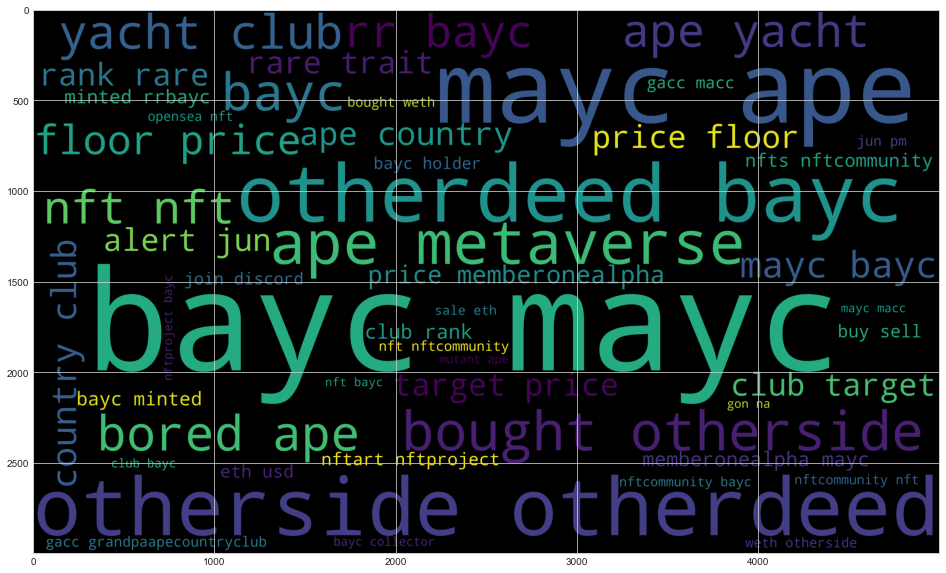

In [314]:
# Generate the word cloud
wc_bayc = WordCloud(width=5000, height=3000, max_words=50).generate(big_string_bayc_tokens)
plt.figure(figsize = (20,10))
plt.imshow(wc_bayc)

In [315]:
bayc_learing_df = bayc_tweet_sentiment_df.copy()
bayc_learing_df = bayc_learing_df[["Tweets","sentiment_score"]]
bayc_learing_df.head()

,Tweets,sentiment_score
0,Top 10 projects with the highest social signal on Ethereum HLD SHIB BAYC,1
0,LMAO BAYC first then NBA,1
0,Otherdeed 51871 bought for 2 2195 6 otherside otherdeed BAYC MAYC APE Metaverse,1
0,Greed bro Like if you have a MAYC or BAYC you already belong to the select few,1
0,Thinking of buying a RR BAYC,1


In [316]:
#Get idea of positive/negetive sentiments using value counts
bayc_learing_df["sentiment_score"].value_counts()

0    24535
1    16301
Name: sentiment_score, dtype: int64

In [317]:
# Create the features set (X) and the target vector (y)
X = bayc_learing_df["Tweets"].values
y = bayc_learing_df["sentiment_score"].values

In [318]:
# Create the train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

***Scoring Sentiment Using RNN LSTM***

Build an RNN LSTM model to score the sentiment of the review comments. You will fit the model using the training and validations sets, and finally, you will get some predictions using the testing set 

In [319]:
# Create an instance of the Tokenizer and fit it with the X text data
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X)

In [320]:
# Print the first five elements of the encoded vocabulary
for token in list(tokenizer.word_index)[:5]:
    print(f"word: '{token}', token: {tokenizer.word_index[token]}")

word: 'bayc', token: 1
word: 'the', token: 2
word: 'to', token: 3
word: 'a', token: 4
word: 'nft', token: 5


In [321]:
#To fit the RNN LSTM model for sentiment scoring, the text data in X should be encoded 
#as sequences. Use the text_to_sequence() method of the tokenizer to transform
#the text data to numerical sequences and save the sequences in a variable called X_seq
# Transform the text data to numerical sequences
X_seq = tokenizer.texts_to_sequences(X)
#For testing proposes, compare the text representation of a movie review with its 
#numerical representation, by printing the first text review in X and the first encoded element in X_seq

# Contrast a sample numerical sequence with its text version
print("**Text comment**")
print({X[0]})
print("**Numerical sequence representation**")
print(X_seq[0])

**Text comment**
{'Top 10 projects with the highest social signal on Ethereum HLD SHIB BAYC'}
**Numerical sequence representation**
[200, 145, 185, 28, 2, 1114, 875, 2266, 18, 85, 2596, 172, 1]


In [322]:
#RNN LSTM models need equal size inputs, so that, pad the sequences 
#stored in X_pad up to 140 integers using the pad_sequences method from Keras. 
#Store the pad size in a variable called max_words.Note: You may use a bigger padding size;
#however, using a bigger value will increase the time that takes fitting the RNN LSTM model
# Set the pad size
max_words = 250

# Pad the sequences using the pad_sequences() method
X_pad = pad_sequences(X_seq, maxlen=max_words, padding="post")


In [323]:
#Create the Training, Validation, and Testing Sets
#Create suitable training, validation, and testing sets for fitting and testing 
#the RNN LSTM model using the encoded review comments.
#Use the train_test_split method from sklearn to create these sets
# Creating training, validation, and testing sets using the encoded data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_pad, y)

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)

In [324]:
#Build and Train the RNN LSTM Model
#We use Embedding layers to analyze text data in RNN LSTM models,
#so this section starts by setting-up some initial variables needed for the RNN LSTM to 
#score sentiment.As it's defined in the Embedding layer documentation of the Keras API, 
#set the input_dim parameter to the size of your vocabulary, 
#so we set the vocabulary_size variable to the length of the number of words in the
#tokenizer plus 1.Also, we define a variable called embedding_size to specify how
#many dimensions will be used to represent each word.
# Model set-up
vocabulary_size = len(tokenizer.word_counts.keys()) + 1
embedding_size = 64


***Define an RNN LSTM model as follows:***
- Layer 1: Add an Embedding layer using the vocabulary_size and embedding_size variables as the first two parameters, and setting input_length=max_words (the same size as the padding).
- Layer 2: Add an LSTM layer with 280 units.Output Layer: Add a Dense layer with 1 unit and sigmoid as activation function.

In [325]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Layer 2
model.add(LSTM(units=280))

# Output layer
model.add(Dense(units=1, activation="sigmoid"))

In [326]:
#Compile the model using the binary_crossentropy loss function, the adam optimizer, 
#and fetch the following metrics: Accuracy, True positives, True negatives,
#False positives, False negatives, Precision, Recall,and AUC.

# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [327]:
#Display the summary of the model using the summary method of the model.
# Show model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 64)           985664    
                                                                 
 lstm_1 (LSTM)               (None, 280)               386400    
                                                                 
 dense_1 (Dense)             (None, 1)                 281       
                                                                 
Total params: 1,372,345
Trainable params: 1,372,345
Non-trainable params: 0
_________________________________________________________________


In [328]:
#Train the RNN LSTM model using a batch size equals to 1000 and ten epochs. 
#Remember to set the validation_data parameter to use your validation sets.
# Training the model
batch_size = 1000
epochs = 10
model.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/10
23/23 [==============================] - 133s 6s/step - loss: 0.6757 - accuracy: 0.6015 - tp: 0.0000e+00 - tn: 13817.0000 - fp: 0.0000e+00 - fn: 9153.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4964 - val_loss: 0.6729 - val_accuracy: 0.6004 - val_tp: 0.0000e+00 - val_tn: 4597.0000 - val_fp: 0.0000e+00 - val_fn: 3060.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/10
23/23 [==============================] - 130s 6s/step - loss: 0.6725 - accuracy: 0.6015 - tp: 0.0000e+00 - tn: 13817.0000 - fp: 0.0000e+00 - fn: 9153.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4941 - val_loss: 0.6729 - val_accuracy: 0.6004 - val_tp: 0.0000e+00 - val_tn: 4597.0000 - val_fp: 0.0000e+00 - val_fn: 3060.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/10
23/23 [==============================] - 130s 6s/step - loss: 0.6725 - accuracy: 0.6015 - tp: 0.0000e+00 - tn: 13817.0000 - fp: 0.0000e+00 - fn: 9153

In [329]:
# Predict classes using the testing data
y_rnn_pred = model.predict(X_test_rnn) > 0.5

320/320 [==============================] - 41s 127ms/step


In [330]:
print("RNN LSTM Accuracy %.2f" % (accuracy_score(y_test_rnn, y_rnn_pred)))

RNN LSTM Accuracy 0.60


In [331]:
#Confusion Matrix
#Scoring the sentiment of the movie reviews as positive or negative is a binary classification
#problem, so use the confusion_matrix method from sklearn to calculate the confusion matrix
#for the RNN LSTM model.

# Confusion matrtix metrics from the RNN LSTM model
tn_rnn, fp_rnn, fn_rnn, tp_rnn = confusion_matrix(y_test_rnn, y_rnn_pred).ravel()

# Dataframe to display confusion matrix from the RNN LSTM model
cm_rnn_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_rnn}", f"FP={fp_rnn}"],
        "Negative(0)": [f"FN={fn_rnn}", f"TN={tn_rnn}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_rnn_df.index.name = "Actual"
cm_rnn_df.columns.name = "Predicted"
print("Confusion Matrix from the RNN LSTM Model")
display(cm_rnn_df)

Confusion Matrix from the RNN LSTM Model


Predicted,Positive(1),Negative(0)
Actual,,
Positive(1),TP=0,FN=4088
Negative(0),FP=0,TN=6121


In [333]:
# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y_rnn_pred, y_test_rnn))

Classification Report for the RNN LSTM Model
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     10209
           1       0.00      0.00      0.00         0

    accuracy                           0.60     10209
   macro avg       0.50      0.30      0.37     10209
weighted avg       1.00      0.60      0.75     10209



In [334]:
# ROC Curve RNN LSTM
#Use the predict() method from the RNN LSTM model to predict the sentiment of 
#the testing data X_test_rnn. Set batch_size=1000 to speed up the predictions and store 
#the results in a variable called test_predictions_rnn.

# Making predictions to feed the roc_curve module
test_predictions_rnn = model.predict(X_test_rnn, batch_size=1000)

# Use the roc_curve method from sklearn to calculate the false positives (fpr)
#and true positives (tpr) rates passing as parameters the testing target sentiments
#(y_test_rnn) and the predictions you compute using the testing data (test_predictions_rnn)
# Data for ROC Curve - RNN LSTM Model
fpr_test_rnn, tpr_test_rnn, thresholds_test_rnn = roc_curve(y_test_rnn, test_predictions_rnn)

11/11 [==============================] - 16s 1s/step


In [335]:
#After calculating the fpr and tpr for the RNN LSTM Model, use the auc method of sklearn 
#to calculate the AUC for this model.Round the final result up to 4 decimals.
# AUC for the RNN LSTM Model
auc_test_rnn = auc(fpr_test_rnn, tpr_test_rnn)
auc_test_rnn = round(auc_test_rnn, 4)

In [336]:
# Once you gather all the data needed to plot the ROC curve, 
#create a DataFrame with the fpr and tpr data from the RNN LSTM model
#Dataframe to plot ROC Curve for the RNN LSTM model
roc_df_test_rnn = pd.DataFrame({"FPR Test": fpr_test_rnn, "TPR Test": tpr_test_rnn,})

<AxesSubplot:title={'center':'Test ROC Curve (AUC=0.5)'}, xlabel='FPR Test'>

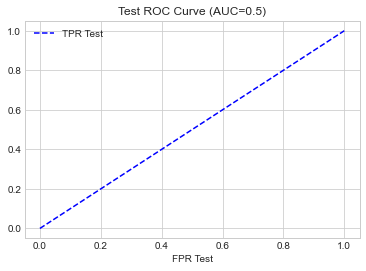

In [337]:
roc_df_test_rnn.plot(
    x="FPR Test",
    y="TPR Test",
    color="blue",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test_rnn})",
)

***Get Etherium price using Alpaca API***

In [338]:
#get Etherium current price using alpaca API
def get_etherium_price():
    eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
    # Fetch current ETH price
    eth_response_data = requests.get(eth_url).json()
    #print(json.dumps(eth_response_data, indent=2))
    eth_price = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]
    return eth_price

eth_price = get_etherium_price()
print(f"The current value of 1 ETH as of {datetime.datetime.now()} is ${eth_price:0.2f}")

The current value of 1 ETH as of 2022-06-19 00:05:02.900303 is $1247.20


***Get the NFT collection price from OpenSea***

In [339]:
headers = {
        "Accept": "application/json",
        "X-API-KEY": opensea_api_key
    }

#this function invokes the opensea API to get the successful events for a NFT collection
# for a particular date range
def get_events(url,start_date, end_date,event_type, collection_slug,limit=1, cursor=''):
    
    query = { 
        "only_opensea": "true", 
        "occurred_before": end_date,
        "occurred_after": start_date,
        "event_type":event_type,
        "collection_slug":collection_slug,
        "limit":limit,
        "cursor": cursor
    }
    
    response_data = requests.request("GET", url, headers=headers, params=query)
    json_data = response_data.json()
    #print(json_data)
    return json_data

collection_stats_base_url = "https://api.opensea.io/api/v1/collection/"
def get_colection_stats(collection_slug):
    url = collection_stats_base_url+collection_slug+"/stats"
    
    response_data = requests.request("GET", url, headers=headers)
    json_data = response_data.json()
    return json_data

#get the stats for the collection for analysis
all_collection_stats={}
collection_stats= get_colection_stats(collection_slug)
all_collection_stats[collection_slug]=collection_stats

*The below function parse_event was available on github repo Ref - https://github.com/Checco9811/opensea-api-nft-sales/blob/main/script.py

In [340]:
#this function parses the event JSON data and gets the data of interest 
# and creates a new dictinary object and returns that
def parse_event(event):
    record = {}
    asset = event.get('asset')
    if asset == None:
        return None # if there's no asset that means it's not a single NFT transaction so skip this item

    #collection
    record['collection_slug'] = asset['collection']['slug']
    record['collection_name'] = asset['collection']['name']
    record['collection_url'] = "https://opensea.io/collection/" + asset['collection']['slug']

    #asset
    record['asset_id'] = asset['id']
    record['asset_name'] = asset['name']
    record['asset_description'] = asset['description']
    record['asset_contract_date'] = asset['asset_contract']['created_date']
    record['asset_url'] = asset['permalink']
    record['asset_img_url'] = asset['image_url']

    #event
    record['event_id'] = event['id']
    record['event_time'] = event.get('created_date')
    record['event_auction_type'] = event.get('auction_type')
    record['event_contract_address'] = event.get('contract_address')
    record['event_quantity'] = event.get('quantity')
    record['event_payment_symbol'] =  None if event.get('payment_token') == None else event.get('payment_token').get('symbol')

    decimals = 18
    if event.get('payment_token') != None:
        decimals = event.get('payment_token').get('decimals')

    price_str = event['total_price']

    try: 
        if len(price_str) < decimals:
            price_str =  "0." + (decimals-len(price_str)) * "0" + price_str
            record['event_total_price'] = float(price_str)
        else:
            record['event_total_price'] = float(price_str[:-decimals] + "." + price_str[len(price_str)-decimals:])
    except:
        print(event)
    #covert ETH price to CAD
    if(record['event_payment_symbol']=='ETH'):
        total_price_CAD = float(record['event_total_price'])* float(eth_price)
        record['event_total_price'] = round(total_price_CAD,2)

    return record

In [341]:
pause = 1
#this function consolidates the invocation to calling API to get the events and 
# parsing the event json data and returns a list

def fetch_all_events(url,start_date, end_date,event_type,collection_slug,limit, pause=1):
    result = list()
    next = ''
    fetch = True

    print(f"Fetching events between {start_date} and {end_date}")
    i =1
    while fetch:
        response = get_events(url,start_date,end_date,event_type,collection_slug, limit, cursor=next)

        for event in response['asset_events']:
            cleaned_event = parse_event(event)
            
            if cleaned_event != None:
                result.append(cleaned_event)
        
        if response['next'] is None:
            fetch = False
        else:
            next = response['next']
        print(f"fetching events for collection:{collection_slug},sleeping for:{pause}, iteration: {i}, limit:{limit}")
        i=i+1
        sleep(pause)

    return result

In [342]:
event_url = "https://api.opensea.io/api/v1/events";
event_type = "successful"
collection_slug = "boredapeyachtclub"

limit = 300

def determine_collection_slug_file_name(collection_slug,start_date,end_date):
    str_start_date = start_date.strftime("%m%d%Y") 
    str_end_date = end_date.strftime("%m%d%Y") 
    file_name = "Data/"+collection_slug+"_"+str_start_date+"_"+str_end_date+".csv"
    return file_name

file_name = determine_collection_slug_file_name(collection_slug,start_date,end_date)
print(file_name)


Data/boredapeyachtclub_06162022_06182022.csv


In [343]:
#this function writes the event data to a csv file to avoid calling the API multiple times
# for the same date range
def write_csv(data, file_name):
    with open(file_name, mode='w', encoding='utf-8', newline='\n') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames = data[0].keys())

        writer.writeheader()
        for event in data:
            writer.writerow(event)
            

In [344]:
# this NFT collection has different assets which will have different prices based on various attributes 
# like rarity. For the sake of simplicity, we will consider the min/floor price of any of the asset
# for a particular day to determine the floor price of the collection for that day
# this function will interate though all the rows and check for different prices for a day.
# it will then pick the min of the price as the floor price for that day (irrespective of the assetId)
def consolidate_price_data_for_dates(df):
    prices_per_day={}
    for i in range(0, len(df)):
        event_date = df.iloc[i]['event_date']
        event_total_price = df.iloc[i]['event_total_price']
        #print(event_date,event_total_price )
        if event_date in prices_per_day:
            value_event_date = prices_per_day.get(event_date)
            value_event_date.append(event_total_price)
        else:
            prices_per_day[event_date]= [event_total_price]

    return prices_per_day

#prices_per_day = consolidate_price_data_for_dates(nft_event_price_df)
#prices_per_day

# once the dictonary is created with key as date and values as different prices for that date,
# iterate over the dictionary, to get the lowest value for that date and create another dictionary

def get_mean_price_data(prices_per_day):
    floor_prices={}
    for key in prices_per_day:
        prices_for_current_day = prices_per_day[key]
        floor_price_current_day = np.mean(prices_for_current_day)
        floor_prices[key]= floor_price_current_day
        #print(key, 'corresponds to', floor_prices[key],floor_price_current_day)
    return floor_prices

In [346]:
event_url = "https://api.opensea.io/api/v1/events";
event_type = "successful"
collection_slug = "boredapeyachtclub"
limit =300
file_name = determine_collection_slug_file_name(collection_slug,start_date,end_date)

def fetch_data_and_get_floor_sales_price(event_url,
                                         start_date,
                                         end_date,
                                         event_type,
                                         collection_slug,
                                         limit,
                                        file_name):
    #this is a dictionary to hold different dataframes
    dataframe_dict={}

    path = Path(file_name)
    if path.is_file():
        print(f'The file {file_name} exists')
    else:
        result = fetch_all_events(event_url,start_date,end_date,event_type,collection_slug, limit)
        print(f"total number of records found:{len(result)}")
        print(f"writing data to file:{file_name}")
        write_csv(result, file_name)
    
    
    nft_events_df = pd.read_csv(file_name)
    nft_event_price_df=nft_events_df[['asset_id','event_time','event_total_price']]

    nft_event_price_df['event_time']= pd.to_datetime(nft_events_df['event_time']).dt.date
    nft_event_price_df.rename(columns = {'event_time':'event_date'}, inplace = True)

    #nft_event_price_df =nft_event_price_df.set_index("event_date")
    #nft_event_price_df
    prices_per_day = consolidate_price_data_for_dates(nft_event_price_df)
    floor_prices = get_mean_price_data(prices_per_day)
    df =pd.DataFrame(floor_prices.items(), columns=['event_date', 'close'])
    
    #get the dataframe close column and calculate rolling median
    #df_close = df[["close"]]
    #df_close = df_close.rolling(5).median() 
    
    # re-assign the close column of the dataframe (first 4 rowa will be NAN)
    #df['close'] = df_close
    #drop the rows having null data due to rolling median
    df.dropna(inplace=True)


    
    df = df.sort_values(by="event_date",axis=0, ascending=True )
    df = df.set_index('event_date')
    # Concatenate the ticker DataFrames
    df_mc = pd.concat([df], axis=1, keys=[collection_slug])
    dataframe_dict["dataframe_orig"] = df
    dataframe_dict["dataframe_for_mc_sim"] = df_mc
    return dataframe_dict

In [347]:
#past_number_days = 6

def get_past_days_range(past_number_days):
    past_days_range=[]
    dt_start = datetime.datetime.now(pytz.timezone("UTC")) \
            .replace(hour=0, minute=0, second=0, microsecond=0) \
            .astimezone(pytz.utc)
    previous_date_start = dt_start - datetime.timedelta(days=past_number_days)
    
    dt_end = datetime.datetime.now(pytz.timezone("UTC")) \
            .replace(hour=23, minute=59, second=59, microsecond=999) \
            .astimezone(pytz.utc)
    return previous_date_start,dt_end

In [348]:
#start_date = datetime.datetime(2022, 6, 15)
#end_date = datetime.datetime(2022, 6, 16)

start_date,end_date  = get_past_days_range(past_number_days)

dataframe_dict = fetch_data_and_get_floor_sales_price(event_url,
                                         start_date,
                                         end_date,
                                         event_type,
                                         collection_slug,
                                         limit,
                                         file_name)

df_boredapeyachtclub_orig = dataframe_dict["dataframe_orig"] 
df_boredapeyachtclub = dataframe_dict["dataframe_for_mc_sim"]

Fetching events between 2022-06-13 00:00:00+00:00 and 2022-06-19 23:59:59.000999+00:00
fetching events for collection:boredapeyachtclub,sleeping for:1, iteration: 1, limit:300
total number of records found:82
writing data to file:Data/boredapeyachtclub_06162022_06182022.csv


In [349]:
df_boredapeyachtclub_orig

,close
event_date,
2022-06-13,73114.740714
2022-06-14,144558.832857
2022-06-15,140479.440000
2022-06-16,128332.910000
2022-06-17,142181.010000
2022-06-18,167956.513333


In [350]:
def create_line_chart(data, title, xlabel, ylabel, color,rot):
    """
    Create a line chart based in the data argument.
    """
    fig=plt.figure()
    line_chart = data.plot(kind="line",
                           title=title,
                           xlabel=xlabel,
                           ylabel=ylabel,
                           color=color,
                           rot=rot)
    #line_chart.get_figure().savefig(title,bbox_inches='tight')
    plt.close(fig)
    return fig

def plot_hvplot_line(df,x,y,xlabel="date",ylable="Price in CAD"):
    line_chart = df.hvplot.line(x=x,
                                y=y,
                                xlabel=xlabel,
                                ylabel=ylable)
    return line_chart

boredapeyactchclub_line_chart= plot_hvplot_line(df_boredapeyachtclub_orig,"event_date","close")
boredapeyactchclub_line_chart

:Curve   [event_date]   (close)

<AxesSubplot:xlabel='date'>

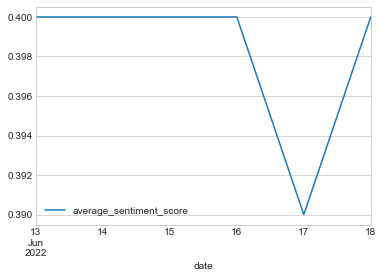

In [351]:
average_sentiment_score_past_days_df = pd.DataFrame(average_sentiment_score_past_days)
average_sentiment_score_past_days_df["date"]  = pd.to_datetime(average_sentiment_score_past_days_df['date'])
average_sentiment_score_past_days_df.set_index('date', inplace=True)
average_sentiment_score_past_days_df.plot()

In [368]:
df_boredapeyachtclub_orig = test = df_boredapeyachtclub_orig.sort_index(ascending=False)


In [374]:
combined_df = pd.concat([average_sentiment_score_past_days_df, df_boredapeyachtclub_orig], axis="columns", join="inner")
#divide close to scale it in same range as sentiment score
combined_df["close"]= combined_df["close"]/1000000
combined_df

,average_sentiment_score,close
2022-06-18,0.40,0.167957
2022-06-17,0.39,0.142181
2022-06-16,0.40,0.128333
2022-06-15,0.40,0.140479
2022-06-14,0.40,0.144559
2022-06-13,0.40,0.073115


<AxesSubplot:>

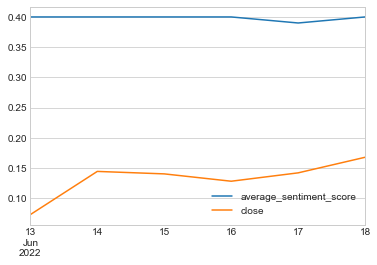

In [373]:
combined_df.plot()

<AxesSubplot:xlabel='average_sentiment_score', ylabel='close'>

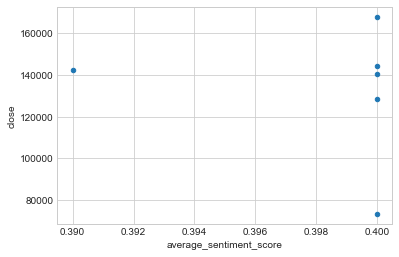

In [363]:
# Plot the relationship between the two variables
combined_df.plot(kind="scatter", x="average_sentiment_score", y="close")

In [364]:
# Calculate the correlation between each column
correlation = combined_df.corr()
correlation

,average_sentiment_score,close
average_sentiment_score,1.0000,-0.1443
close,-0.1443,1.0000


<AxesSubplot:>

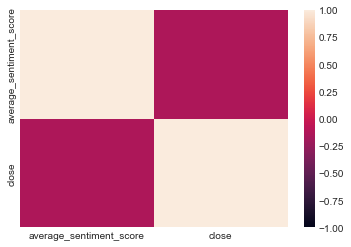

In [366]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)